## Analyze Tweets

In [1]:
import pandas as pd 
import re 
import string
import itertools
import collections
import networkx as nx

from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [2]:
# read data
filename = "2021_22 network tweets.csv"

df = pd.read_csv(filename)


In [3]:
df.head()

,username,replied_to_username,location,verified,created_at,text
0,chris155223,,,False,2021-10-25 23:59:43+00:00,Beal playing like Westbrick right now I’m sick...
1,benjamin_idumu,Trevor_Lane,,False,2021-10-25 23:52:11+00:00,@Trevor_Lane @LakersNation Tears who picked we...
2,mattyice2ish,,,False,2021-10-25 23:48:54+00:00,Justin Robinson &gt; Russell Westbrook
3,MikeRob95601665,RTNBA,,False,2021-10-25 23:47:42+00:00,@RTNBA Favorite player: Westbrook \nPlayer I d...
4,iluvjaybandjayt,,,False,2021-10-25 23:46:09+00:00,i’ve seen wayyy too many russell westbrook com...


In [21]:
df2 = df[df.replied_to_username != ' ']

In [15]:
df.shape[0]

1927

In [5]:
tweets = df.text.tolist()
for t in tweets[:15]:
    print(t)

If Russell Westbrook don't get MVP this season imma cry
Nothing about Russell Westbrook game changed. He has been playing this for years. Bandwagon'rs!!!
Russell Westbrook and Damian Lillard are ballers
Will Russell Westbrook win MVP this season?
Russell Westbrook for MVP, homecoming king, president, and whatever else
After a historic start of the season for Russell Westbrook, was Kevin Durant the one holding him back this whole time?
Russell Westbrook = MVP ???
RIP to the Warriors, they ain't dead Russell Westbrook just finna destroy them on Thursday
I need to design a Russell Westbrook Revenge Tour t shirt
Russell Westbrook has to be everyone's favorite player at this point.
The way Russell Westbrook been playing this season has been scary. I can't wait for OKC vs GSW.
Is Russell Westbrook a million dollars on FanDuel yet?
#RussellWestbrook LeBron James, Russell Westbrook named NBA Players of the Week
Russell Westbrook is my spirit animal
This nigga Russell Westbrook really be puttin

In [3]:
# clean and stem words
def preprocess_text(text): 
    # get lowercase
    text = text.lower()
    # remove quotations
    text = text.replace("\"", "")
    text = text.replace("\'", "")
    text = text.replace("&", "")
    text = text.replace("’", "")
    # remove urls
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    # remove punctuation
    text = text.replace("_", " ")
    text = text.translate(text.maketrans('', '', string.punctuation))    
    # strip whitespace
    text = text.strip()
    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [w for w in tokens if not w in stop_words]
    text = " ".join(w for w in words)
    # stemming
#     stemmer= PorterStemmer()
#     tokens = word_tokenize(text)
#     words = [stemmer.stem(w) for w in tokens]
#     result = " ".join(w for w in words)
    return text

In [4]:
# put all tweets into a corpus
text_list = df.text.tolist()
corpus = " ".join(text_list)

# preprocess text
processed_text = preprocess_text(corpus)

In [5]:
print(processed_text)

beal playing like westbrick right im sick🤮🤮🤮🤮 trevor lane lakersnation tears picked westbrick justin robinson gt russell westbrook rtnba favorite player westbrook player dislike harden player grew steph curry overrated bill russell underrated tmac goat mj ive seen wayyy many russell westbrook commercials team caleb barnes paul george bill russell stephen curry russell westbrook getnickwright nick taking ls russell westbrook past 3 weeks sunsplzwin russell westbrook donzionda aristires03 ballislife 128 str8 gms making 3 im 100 sure thats sumn westbrick never last digit like hit 3 save life 1 klay thompson 2 dwight howard 3 russell westbrook 4 devin booker 5 stephen curry 6 lebron james 7 damian lillard 8 joe harris 9 giannis 0 javale mcgee team russell westbrook chris paul kyrie irving batman blake griffin rtnba favorite player time larry bird player like patrick beverley player grew trae young overrated player russell westbrook underrated player grant hill goat mj thehoopcentral russel

### Example WordCloud

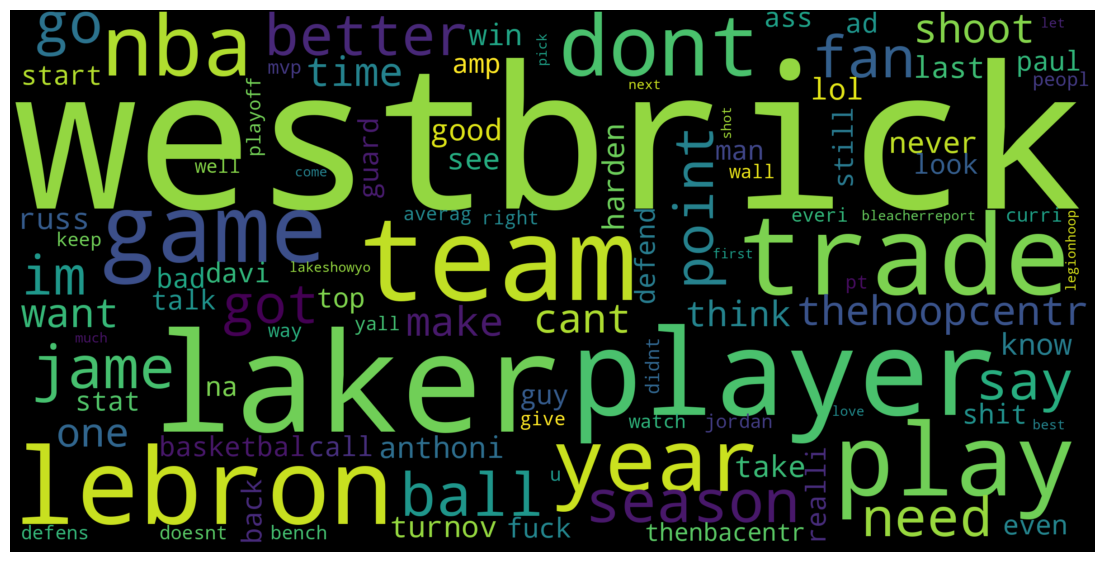

In [7]:
# remove query words from word cloud
wordcloud_text = processed_text.replace("russel", '')
wordcloud_text = wordcloud_text.replace("westbrook", '')

wordcloud = WordCloud( max_font_size=100, max_words=100, width = 400, height = 200, 
                      scale = 6, collocations=False).generate(wordcloud_text)
plt.figure(figsize=(14, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Counts

In [10]:
from collections import Counter

# split text into words
words = wordcloud_text.split()
counter = Counter(words)

In [11]:
counter.most_common(15)

[('nbavot', 287),
 ('mvp', 267),
 ('nba', 266),
 ('jame', 208),
 ('game', 195),
 ('harden', 158),
 ('team', 156),
 ('way', 147),
 ('player', 133),
 ('season', 131),
 ('im', 130),
 ('tripl', 112),
 ('doubl', 111),
 ('get', 89),
 ('point', 89)]

## Bigrams 

In [6]:
posts = df.text.values
# preprocess posts
processed_posts = [preprocess_text(text) for text in posts]

words_in_post = [post.lower().split() for post in processed_posts]
posts = [[word for word in post_words] for post_words in words_in_post]
# Create list of lists containing bigrams in posts
terms_bigram = [list(bigrams(post)) for post in posts]

In [8]:
# Flatten list of bigrams in clean posts
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(20),columns=['bigram', 'count'])

bigram_df2 = bigram_df.drop(labels=[6, 17], axis=0)
bigram_df

,bigram,count
0,"(russell, westbrook)",1073
1,"(lebron, james)",49
2,"(russell, westbrick)",47
3,"(russell, westbrooks)",40
4,"(james, harden)",35
5,"(anthony, davis)",34
6,"(gon, na)",30
7,"(john, wall)",28
8,"(carmelo, anthony)",23
9,"(trade, westbrick)",23


In [9]:
bigram_df2

,bigram,count
0,"(russell, westbrook)",1073
1,"(lebron, james)",49
2,"(russell, westbrick)",47
3,"(russell, westbrooks)",40
4,"(james, harden)",35
5,"(anthony, davis)",34
7,"(john, wall)",28
8,"(carmelo, anthony)",23
9,"(trade, westbrick)",23
10,"(point, guard)",23


In [10]:
# Create dictionary of bigrams and their counts
d = bigram_df2.set_index('bigram').T.to_dict('records')

In [11]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

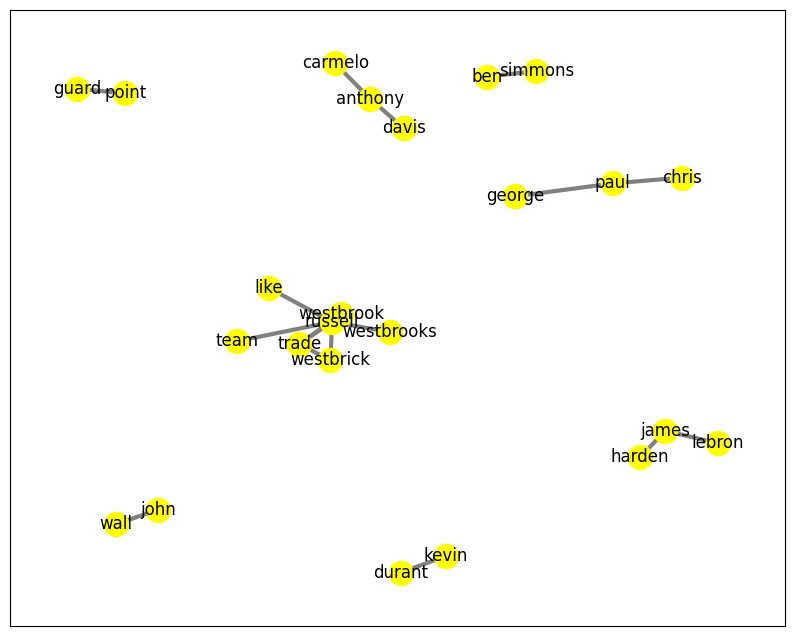

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=3,
                 edge_color='grey',
                 node_color='yellow',
                 with_labels = True,
                 ax=ax)
    
plt.show()